## Temperature Forecasting of Chitwan, Nepal

Importing library

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model  import ARIMA
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace import tools 
import pandas as pd
from pmdarima import auto_arima
from datetime import datetime

For this project we will be using the District Wise Monthly Climate Data for Nepal provided by opendatanepal

The dataset contains data on Nepal's climate on different parameters. These data were obtained from the NASA Langley Research Center (LaRC) POWER Project funded through the NASA Earth Science/Applied Science Program and extracted using NASA's power access API.

Date (yyyy-mm-dd): 1981-01-01 to 2019-12-31

Parameters
PRECTOT: MERRA2 1/2x1/2 Precipitation (mm day-1)

PS: MERRA2 1/2x1/2 Surface Pressure (kPa)

QV2M: MERRA2 1/2x1/2 Specific Humidity at 2 Meters (g/kg)

RH2M: MERRA2 1/2x1/2 Relative Humidity at 2 Meters (%)

T2M: MERRA2 1/2x1/2 Temperature at 2 Meters (C)

T2MWET: MERRA2 1/2x1/2 Wet Bulb Temperature at 2 Meters (C)

T2M_MAX: MERRA2 1/2x1/2 Maximum Temperature at 2 Meters (C)

T2M_MIN: MERRA2 1/2x1/2 Minimum Temperature at 2 Meters (C)

T2M_RANGE: MERRA2 1/2x1/2 Temperature Range at 2 Meters (C)

TS: MERRA2 1/2x1/2 Earth Skin Temperature (C)

WS10M: MERRA2 1/2x1/2 Wind Speed at 10 Meters (m/s)

WS10M_MAX: MERRA2 1/2x1/2 Maximum Wind Speed at 10 Meters (m/s)

WS10M_MIN: MERRA2 1/2x1/2 Minimum Wind Speed at 10 Meters (m/s)

WS10M_RANGE: MERRA2 1/2x1/2 Wind Speed Range at 10 Meters (m/s)

WS50M: MERRA2 1/2x1/2 Wind Speed at 50 Meters (m/s)

WS50M_MAX: MERRA2 1/2x1/2 Maximum Wind Speed at 50 Meters (m/s)

WS50M_MIN: MERRA2 1/2x1/2 Minimum Wind Speed at 50 Meters (m/s)

WS50M_RANGE: MERRA2 1/2x1/2 Wind Speed Range at 50 Meters (m/s)

In [37]:
df =   pd.read_csv("climate_data_nepal_district_wise_monthly.csv",
              index_col = "DATE",
              parse_dates = True)

In [4]:
df.head()

,YEAR,MONTH,DISTRICT,LAT,LON,PRECTOT,PS,QV2M,RH2M,T2M,...,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE
DATE,,,,,,,,,,,,,,,,,,,,,
1981-01-31,1981,1,Arghakhanchi,27.9,83.2,67.31,93.78,5.28,53.09,13.03,...,10.03,11.19,2.01,3.39,0.81,2.59,2.70,4.22,1.06,3.16
1981-02-28,1981,2,Arghakhanchi,27.9,83.2,3.37,93.52,5.13,40.88,16.67,...,13.08,15.10,2.58,4.88,0.95,3.94,3.51,5.62,1.09,4.53
1981-03-31,1981,3,Arghakhanchi,27.9,83.2,26.02,93.40,5.91,35.84,20.83,...,13.52,20.58,2.73,4.67,1.02,3.65,3.73,5.72,1.38,4.34
1981-04-30,1981,4,Arghakhanchi,27.9,83.2,46.15,93.03,6.52,29.81,25.50,...,15.03,25.63,2.89,4.78,1.07,3.72,3.82,5.66,1.35,4.31
1981-05-31,1981,5,Arghakhanchi,27.9,83.2,69.45,92.75,9.95,37.25,28.89,...,13.43,29.99,2.69,4.40,0.93,3.47,3.52,5.29,1.30,4.00


# Preprocessing the data

we will be using doning analysis on chitwan district only on Earth Skin Temperature.



In [38]:
df = df.loc[df['DISTRICT'] == 'Chitawan']

In [40]:
df = df.loc[:, ['TS']]

In [41]:
df.head()

,TS
DATE,
1981-01-31,10.84
1981-02-28,14.98
1981-03-31,20.44
1981-04-30,24.86
1981-05-31,28.66


In [42]:
df.describe()

,TS
count,468.000000
mean,21.696923
std,6.488945
min,8.780000
25%,15.667500
50%,23.275000
75%,26.917500
max,33.330000


In [25]:
df.shape

(468,)

# Visualizing the data

In [45]:
def plot_series(X, title='Time Series Plot', y_label='Value of temperature', figsize=(16, 6)):
    fig = plt.figure(figsize=figsize)
    plt.plot(X, linewidth=3)
    plt.title(title, fontsize=18)
    plt.xlabel('Time', fontsize=16)
    plt.ylabel(y_label, fontsize=16)
    plt.grid()
    plt.show()

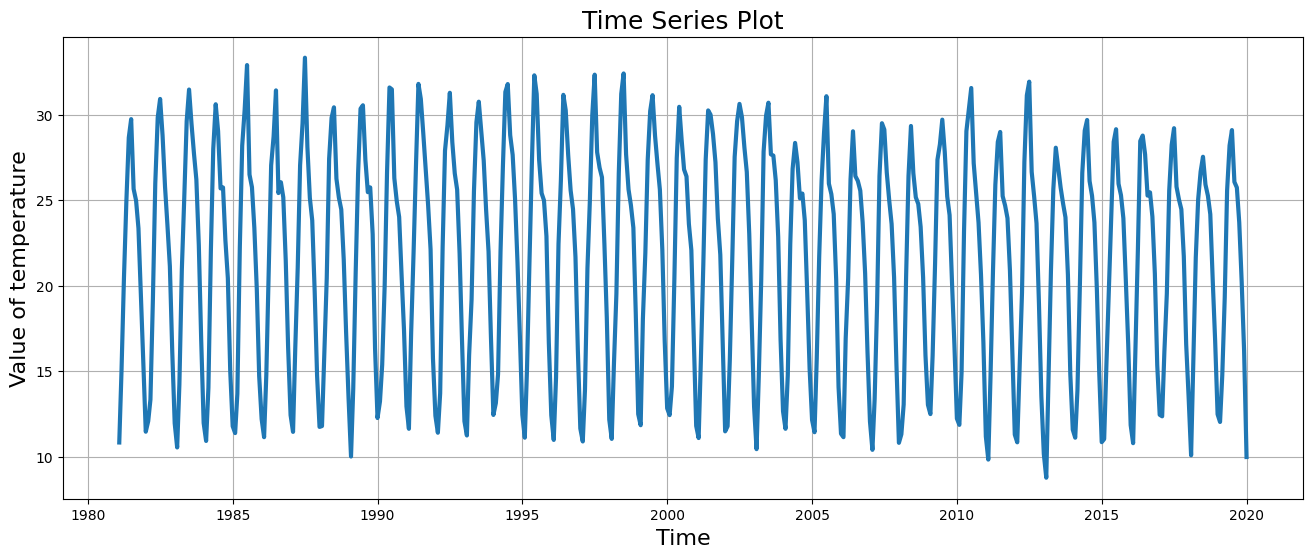

In [46]:
plot_series(df)

We can see the repeating pattern that referring presence of seasonality in our dataset

ploting the temperature for 12 months for each year

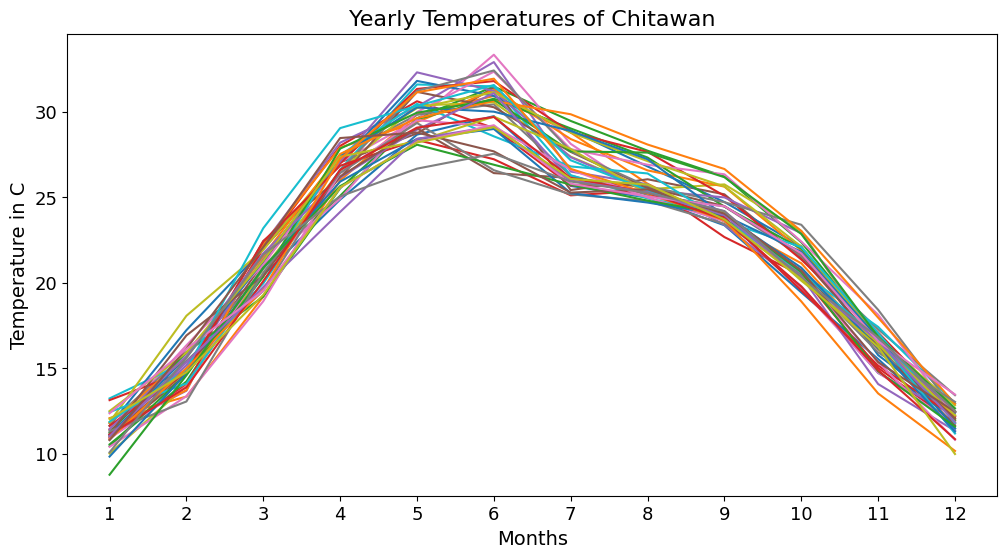

In [48]:
def plot_mont(X):
    index = pd.DatetimeIndex(df.index) 
    pivot = pd.pivot_table(df, values='TS', index=index.month, columns=index.year)
    pivot.plot(figsize=(12, 6), fontsize=13)
    plt.title('Yearly Temperatures of Chitawan', fontsize=16)
    plt.ylabel('Temperature in C', fontsize=14)
    plt.xlabel('Months', fontsize=14)
    plt.xticks(range(1, 13))
    plt.legend().remove()
    plt.plot()

plot_mont(df)

The overall pattern for a year seems to repeat over the years. Secondly, checking the autocorrelations for the data. For seasonal data, the autocorrelations show seasonality too. Let's plot the ACF graph and see.

c:\Users\dell\OneDrive\Documents\FuseMachine AI fellowship\Assignment Deep learning\assignment\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


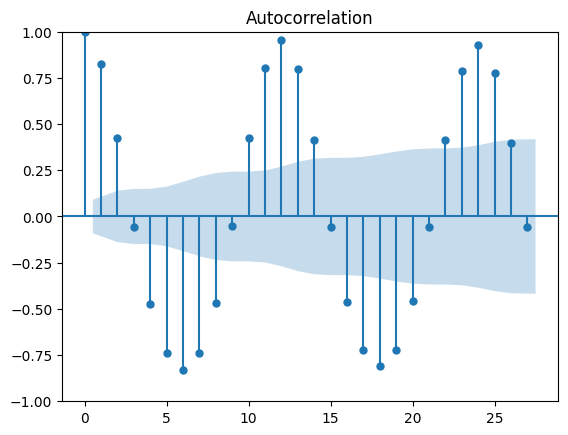

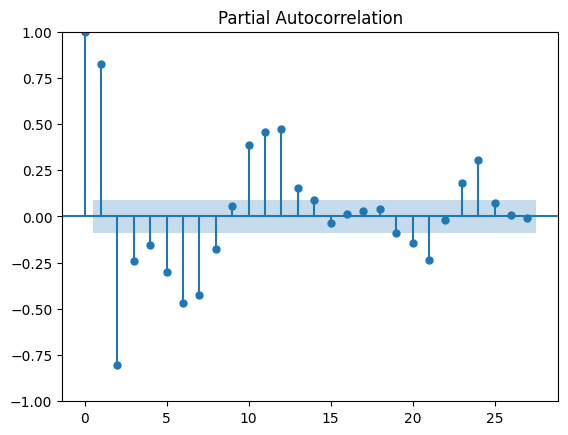

In [50]:
def plotCorr(x):
    plot_acf(x)
    plot_pacf(x)

plotCorr(df)

Since our data is monthly assigning season = 12

In [51]:
season = 12

# Stationarity Check

Stationary of the time series can be checked using ADF test

In [54]:
def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

In [55]:
perform_adf_test(df)

ADF Statistic: -3.175292
p-value: 0.021460
Critical Values:
	1%: -3.445
	5%: -2.868
	10%: -2.570


Here the p- value is not significantly lower. 

# Train Test Split

In [65]:
start_date = datetime(1981,1,31)
end_date = datetime(2009,12,31)
train_set = df[start_date:end_date]
test_set = df[datetime(2010,1,31):]

Since Seasonality is present in the data we will be using the SARIMA model. 

Finding the best order for the model

In [66]:
#SARIMA model
model = auto_arima(y = train_set,
                   m = 12,trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=1128.180, Time=1.10 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=2298.803, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.65 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=1706.462, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=3167.117, Time=0.02 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=1347.053, Time=0.83 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=inf, Time=0.91 sec
 ARIMA(2,0,2)(2,0,1)[12] intercept   : AIC=1218.967, Time=2.53 sec
 ARIMA(2,0,2)(1,0,2)[12] intercept   : AIC=1099.708, Time=2.21 sec
 ARIMA(2,0,2)(0,0,2)[12] intercept   : AIC=1282.352, Time=1.79 sec
 ARIMA(2,0,2)(2,0,2)[12] intercept   : AIC=1073.863, Time=2.30 sec
 ARIMA(1,0,2)(2,0,2)[12] intercept   : AIC=1072.688, Time=2.34 sec
 ARIMA(1,0,2)(1,0,2)[12] intercept   : AIC=1072.165, Time=1.85 sec
 ARIMA(1,0,2)(0,0,2)[12] intercept   : AIC=1423.256, Time=0.79 sec
 ARIMA(1,0,2)(1,0,1)[12] inte

Fitting the model

In [67]:
model = ARIMA(train_set, order=(1,0, 0), seasonal_order=(1,0,1, 12), )
#fit the model
model_fit = model.fit()
#summary of the model
print(model_fit.summary())

c:\Users\dell\OneDrive\Documents\FuseMachine AI fellowship\Assignment Deep learning\assignment\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
c:\Users\dell\OneDrive\Documents\FuseMachine AI fellowship\Assignment Deep learning\assignment\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
c:\Users\dell\OneDrive\Documents\FuseMachine AI fellowship\Assignment Deep learning\assignment\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                                 TS   No. Observations:                  348
Model:             ARIMA(1, 0, 0)x(1, 0, [1], 12)   Log Likelihood                -521.355
Date:                            Thu, 02 Nov 2023   AIC                           1052.709
Time:                                    22:25:33   BIC                           1071.970
Sample:                                01-31-1981   HQIC                          1060.377
                                     - 12-31-2009                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.6475      2.347      9.223      0.000      17.047      26.248
ar.L1          0.4469      0.054   

Making Predictions on the test data and evaluating the Errors

In [68]:
test_set

,TS
DATE,
2010-01-31,11.87
2010-02-28,14.92
2010-03-31,23.19
2010-04-30,29.04
2010-05-31,30.34
...,...
2019-08-31,25.74
2019-09-30,23.70
2019-10-31,20.20


In [70]:
model_fit.forecast(24)

2010-01-31    11.529407
2010-02-28    15.061828
2010-03-31    20.870929
2010-04-30    26.775809
2010-05-31    29.367488
2010-06-30    29.183936
2010-07-31    26.925297
2010-08-31    25.744469
2010-09-30    24.273705
2010-10-31    21.015307
2010-11-30    16.203521
2010-12-31    12.173072
2011-01-31    11.503773
2011-02-28    15.051864
2011-03-31    20.864912
2011-04-30    26.769164
2011-05-31    29.360597
2011-06-30    29.177904
2011-07-31    26.921222
2011-08-31    25.741392
2011-09-30    24.271755
2011-10-31    21.015740
2011-11-30    16.207444
2011-12-31    12.179912
Freq: M, Name: predicted_mean, dtype: float64

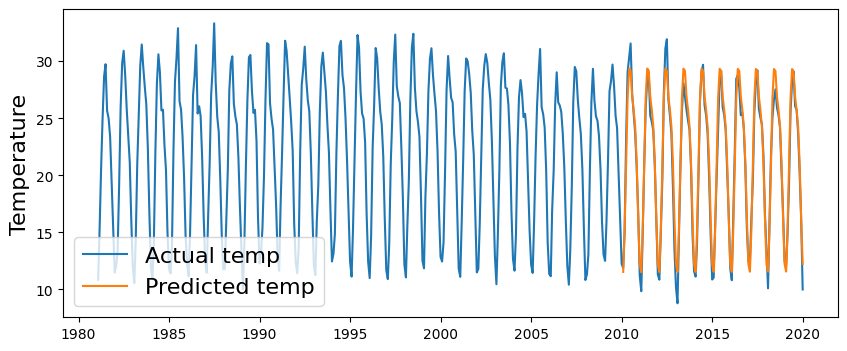

In [88]:
def predict(length, model):
    predictions = model.forecast(length)
    predictions = pd.Series(predictions, index=test_set.index)
    plt.figure(figsize=(10,4))

    plt.plot(df)
    plt.plot(predictions)

    plt.legend(('Actual temp', 'Predicted temp'), fontsize=16)

    plt.ylabel('Temperature', fontsize=16)

    return predictions

predictions = predict(len(test_set), model_fit)

## Calculating Residuals

In [78]:
# calculate residuals
residuals = test_set['TS'] - predictions
residuals

DATE
2010-01-31    0.340593
2010-02-28   -0.141828
2010-03-31    2.319071
2010-04-30    2.264191
2010-05-31    0.972512
                ...   
2019-08-31    0.022209
2019-09-30   -0.556626
2019-10-31   -0.819382
2019-11-30    0.001195
2019-12-31   -2.244492
Length: 120, dtype: float64

In [79]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

Root Mean Squared Error: 1.119968540259589


As we can see our model is actually doing a good job on predictions. Training the model on complete dataset and making new forecast for upcoming year

In [80]:
final_model = ARIMA(df, order=(1,0, 0), seasonal_order=(1,0,1, 12), )
#fit the model
final_model_fit = final_model.fit()
#summary of the model
print(final_model_fit.summary())

c:\Users\dell\OneDrive\Documents\FuseMachine AI fellowship\Assignment Deep learning\assignment\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
c:\Users\dell\OneDrive\Documents\FuseMachine AI fellowship\Assignment Deep learning\assignment\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
c:\Users\dell\OneDrive\Documents\FuseMachine AI fellowship\Assignment Deep learning\assignment\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                                 TS   No. Observations:                  468
Model:             ARIMA(1, 0, 0)x(1, 0, [1], 12)   Log Likelihood                -682.955
Date:                            Thu, 02 Nov 2023   AIC                           1375.911
Time:                                    22:33:35   BIC                           1396.653
Sample:                                01-31-1981   HQIC                          1384.073
                                     - 12-31-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.4678      2.332      9.207      0.000      16.898      26.038
ar.L1          0.4762      0.044   

# Making Future Predictions

2020-01-31    10.170641
2020-02-29    14.734242
2020-03-31    20.386608
2020-04-30    26.104415
2020-05-31    28.586703
2020-06-30    28.953468
2020-07-31    26.151456
2020-08-31    25.388012
2020-09-30    24.043754
2020-10-31    20.604705
2020-11-30    16.023482
2020-12-31    11.785516
2021-01-31    11.028838
2021-02-28    15.143667
2021-03-31    20.580455
2021-04-30    26.193981
2021-05-31    28.626736
2021-06-30    28.970347
2021-07-31    26.158897
2021-08-31    25.390654
2021-09-30    24.044633
2021-10-31    20.606239
2021-11-30    16.026900
2021-12-31    11.790928
2022-01-31    11.034527
2022-02-28    15.147099
2022-03-31    20.580955
2022-04-30    26.191471
2022-05-31    28.622920
2022-06-30    28.966344
2022-07-31    26.156394
2022-08-31    25.388560
2022-09-30    24.043258
2022-10-31    20.606699
2022-11-30    16.029805
2022-12-31    11.796095
2023-01-31    11.040097
Freq: M, Name: predicted_mean, dtype: float64

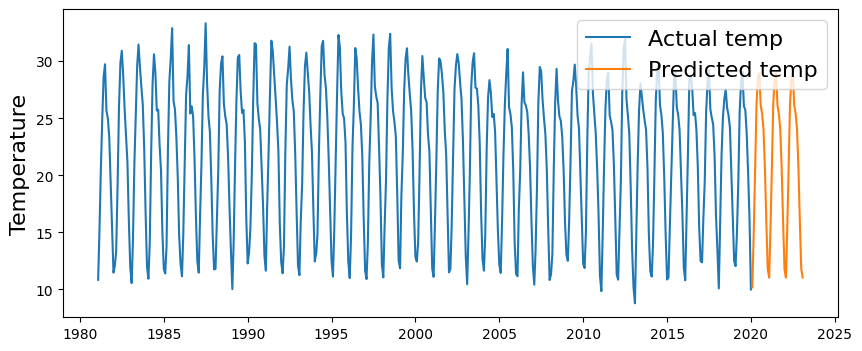

In [99]:
predictions = final_model_fit.predict(start= len(df), end= len(df)+36)
predictions = pd.Series(predictions)
plt.figure(figsize=(10,4))

plt.plot(df)
plt.plot(predictions)

plt.legend(('Actual temp', 'Predicted temp'), fontsize=16)

plt.ylabel('Temperature', fontsize=16)

predictions